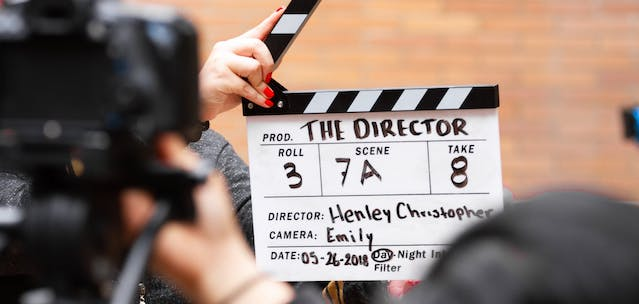

Name: Ryan Posternak<br>
Pace: Full-time Live NYC<br>
Project Review Date: 6/3/22<br>
Instructor Name: Joseph Mata

# Phase 1 Project: Microsoft Movie Analysis<br>

# Overview

This project utilizes the data of IMDb and box office statistics...

<br>

# Business Understanding

To be completed

<br>

# Data Understanding

To be completed

In [1]:
# import packages

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Increse default resolution of matplotlib visualizations

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Initiate connection to IMDb sqlite dataset

conn = sqlite3.Connection("zippedData/im.db")

### Display all tables from IMDb dataset

In [129]:
imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""

pd.read_sql(imdb_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


For this project, the only tables in the IMDb dataset I will be using are the "movie_basics" table and the "movie_ratings" table.

### moving_basics table

In [125]:
movie_basics = """
SELECT *
FROM movie_basics
"""

pd.read_sql(movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### movie_ratings table

In [6]:
movie_ratings = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
# Initialize connection to csv box office dataset

bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

### box office dataset

In [8]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Convert movie_basics and moving_ratings tables to pandas objects

In [126]:
movie_basics_df = pd.read_sql(movie_basics, conn)
movie_ratings_df = pd.read_sql(movie_ratings, conn)
print(f"movie_basics_df type: {type(movie_basics_df)}")
print(f"movie_ratings_df type: {type(movie_ratings_df)}")

movie_basics_df type: <class 'pandas.core.frame.DataFrame'>
movie_ratings_df type: <class 'pandas.core.frame.DataFrame'>


### Basic information on count of records, columns, missing values, and datatypes

In [10]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


<br>
As we can see, the IMDb movie_basics table has information on many more movies (~146k) than the IMDb movie_ratings table (~74k). Both of these have significantly more records than the box office dataset (~3.3k)<br>
<br>
We also see that the 'foreign_gross' series of bom_df is of Dtype object for some reason, while the domestic gross is of Dtype float as we would expect.

### Some descriptive statistics on the movie_ratings dataframe

In [127]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Minimum rating of 1.00, maximum rating of 10.00<br>
Mean rating of 6.33<br>
Median rating of 6.50<br>
Standard deviation of 1.47

<br>

# Data Preparation

### Convert 'foreign_gross' to type float
As noted above, the 'foreign_gross' series of bom_df is of datatype object. I convert this to float in order to combine it with 'domestic_gross' below

In [14]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float')
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### Drop unnecessary columns

In [15]:
movie_basics_df = movie_basics_df[['movie_id', 'primary_title', 'runtime_minutes', 'genres']]
movie_basics_df

,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,None


### Create bom_df_domestic dataframe and bom_df_total dataframe
The domestic dataframe will contain only domestic_gross values, and the bom_df_total dataframe will contain both domestic_gross and foreign_gross plus a new series called total_gross that combines the two.<br>
<br>
I create two different dataframes because we are missing 1,350 records in the foreign_gross series, which could skew our analysis

In [16]:
bom_df_domestic = bom_df[['title', 'domestic_gross']]
bom_df_domestic

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [17]:
bom_df_total = bom_df[['title', 'domestic_gross', 'foreign_gross']]
bom_df_total['total_gross'] = bom_df_total['domestic_gross'] + bom_df_total['foreign_gross']

<ipython-input-17-7007db1b6f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_df_total['total_gross'] = bom_df_total['domestic_gross'] + bom_df_total['foreign_gross']


In [18]:
bom_df_total

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,The Quake,6200.0,NaN,NaN
3383,Edward II (2018 re-release),4800.0,NaN,NaN
3384,El Pacto,2500.0,NaN,NaN
3385,The Swan,2400.0,NaN,NaN


### Remove missing values

Here I remove missing domestic_gross values. We can see that 28 records were removed.

In [19]:
bom_df_domestic = bom_df_domestic.dropna(subset=['domestic_gross'])
bom_df_domestic.shape

(3359, 2)

Here I remove missing total_gross values. We can see that 1,378 records were removed.

In [20]:
bom_df_total = bom_df_total.dropna(subset=['total_gross'])
bom_df_total.shape

(2009, 4)

### Merge movie_basics_df and movie_ratings_df dataframes into imdb_df dataframe

In [21]:
imdb_df = movie_basics_df.merge(movie_ratings_df, on='movie_id', how='inner')
imdb_df

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,NaN,None,6.6,5


### Create datasets of average rating vs. gross revenues

First, I rename the 'title' column names to 'primary_title' to match the IMDb dataset

In [22]:
bom_df_domestic = bom_df_domestic.rename(columns={'title': 'primary_title'})
bom_df_total = bom_df_total.rename(columns={'title': 'primary_title'})

Next, I merge the IMDb dataset with both domestic and total bom_df datasets on the 'primary_title' column

In [128]:
gross_vs_rating_domestic = imdb_df[['primary_title', 'averagerating']].merge\
                           (bom_df_domestic[['primary_title', 'domestic_gross']], on='primary_title', how='inner')

gross_vs_rating_domestic

,primary_title,averagerating,domestic_gross
0,Wazir,7.1,1100000.0
1,On the Road,6.1,744000.0
2,On the Road,6.0,744000.0
3,On the Road,5.7,744000.0
4,The Secret Life of Walter Mitty,7.3,58200000.0
...,...,...,...
3000,The Chambermaid,7.1,300.0
3001,How Long Will I Love U,6.5,747000.0
3002,Helicopter Eela,5.4,72000.0
3003,Last Letter,6.4,181000.0


In [24]:
gross_vs_rating_total = imdb_df[['primary_title', 'averagerating']].merge\
                        (bom_df_total[['primary_title', 'total_gross']], on='primary_title', how='inner')

gross_vs_rating_total

,primary_title,averagerating,total_gross
0,On the Road,6.1,8744000.0
1,On the Road,6.0,8744000.0
2,On the Road,5.7,8744000.0
3,The Secret Life of Walter Mitty,7.3,188100000.0
4,A Walk Among the Tombstones,6.5,53200000.0
...,...,...,...
1805,Detective Chinatown 2,6.1,544100000.0
1806,Hereditary,7.3,79400000.0
1807,Nobody's Fool,4.6,33500000.0
1808,How Long Will I Love U,6.5,82847000.0


In [25]:
gross_vs_rating_foreign = imdb_df[['primary_title', 'averagerating']].merge\
                          (bom_df_total[['primary_title', 'foreign_gross']], on='primary_title', how='inner')

gross_vs_rating_foreign

,primary_title,averagerating,foreign_gross
0,On the Road,6.1,8000000.0
1,On the Road,6.0,8000000.0
2,On the Road,5.7,8000000.0
3,The Secret Life of Walter Mitty,7.3,129900000.0
4,A Walk Among the Tombstones,6.5,26900000.0
...,...,...,...
1805,Detective Chinatown 2,6.1,542100000.0
1806,Hereditary,7.3,35300000.0
1807,Nobody's Fool,4.6,1800000.0
1808,How Long Will I Love U,6.5,82100000.0


### Create datasets of most successful movie genres, both domestic and foreign

First, I merge the IMDb dataset with the bom_df_domestic dataset

In [26]:
genre_success_domestic = imdb_df[['primary_title', 'genres']].merge\
                         (bom_df_domestic[['primary_title', 'domestic_gross']], on='primary_title', how='inner')

Next, I drop duplicate movie titles. While we will lose some records by doing this, we will still have plenty of data points for an accurate analysis, and will get rid of a lot of noise.

In [27]:
genre_success_domestic['primary_title'] = genre_success_domestic['primary_title'].drop_duplicates(keep=False)

In [28]:
genre_success_domestic

,primary_title,genres,domestic_gross
0,Wazir,"Action,Crime,Drama",1100000.0
1,NaN,"Adventure,Drama,Romance",744000.0
2,NaN,Drama,744000.0
3,NaN,Drama,744000.0
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",58200000.0
...,...,...,...
3000,The Chambermaid,Drama,300.0
3001,How Long Will I Love U,Romance,747000.0
3002,Helicopter Eela,Drama,72000.0
3003,Last Letter,"Drama,Romance",181000.0


In [29]:
genre_success_domestic['genres'].value_counts()[:20]

Drama                         316
Comedy,Drama                  133
Comedy,Drama,Romance          132
Drama,Romance                 112
Documentary                   108
Comedy                         94
Adventure,Animation,Comedy     75
Comedy,Romance                 72
Drama,Thriller                 54
Action,Adventure,Sci-Fi        47
Action,Crime,Drama             45
Biography,Drama,History        44
Action,Comedy,Crime            40
Action,Adventure,Drama         38
Biography,Drama                38
Crime,Drama,Thriller           38
Action,Crime,Thriller          36
Horror,Mystery,Thriller        33
Action,Adventure,Comedy        32
Crime,Drama                    32
Name: genres, dtype: int64

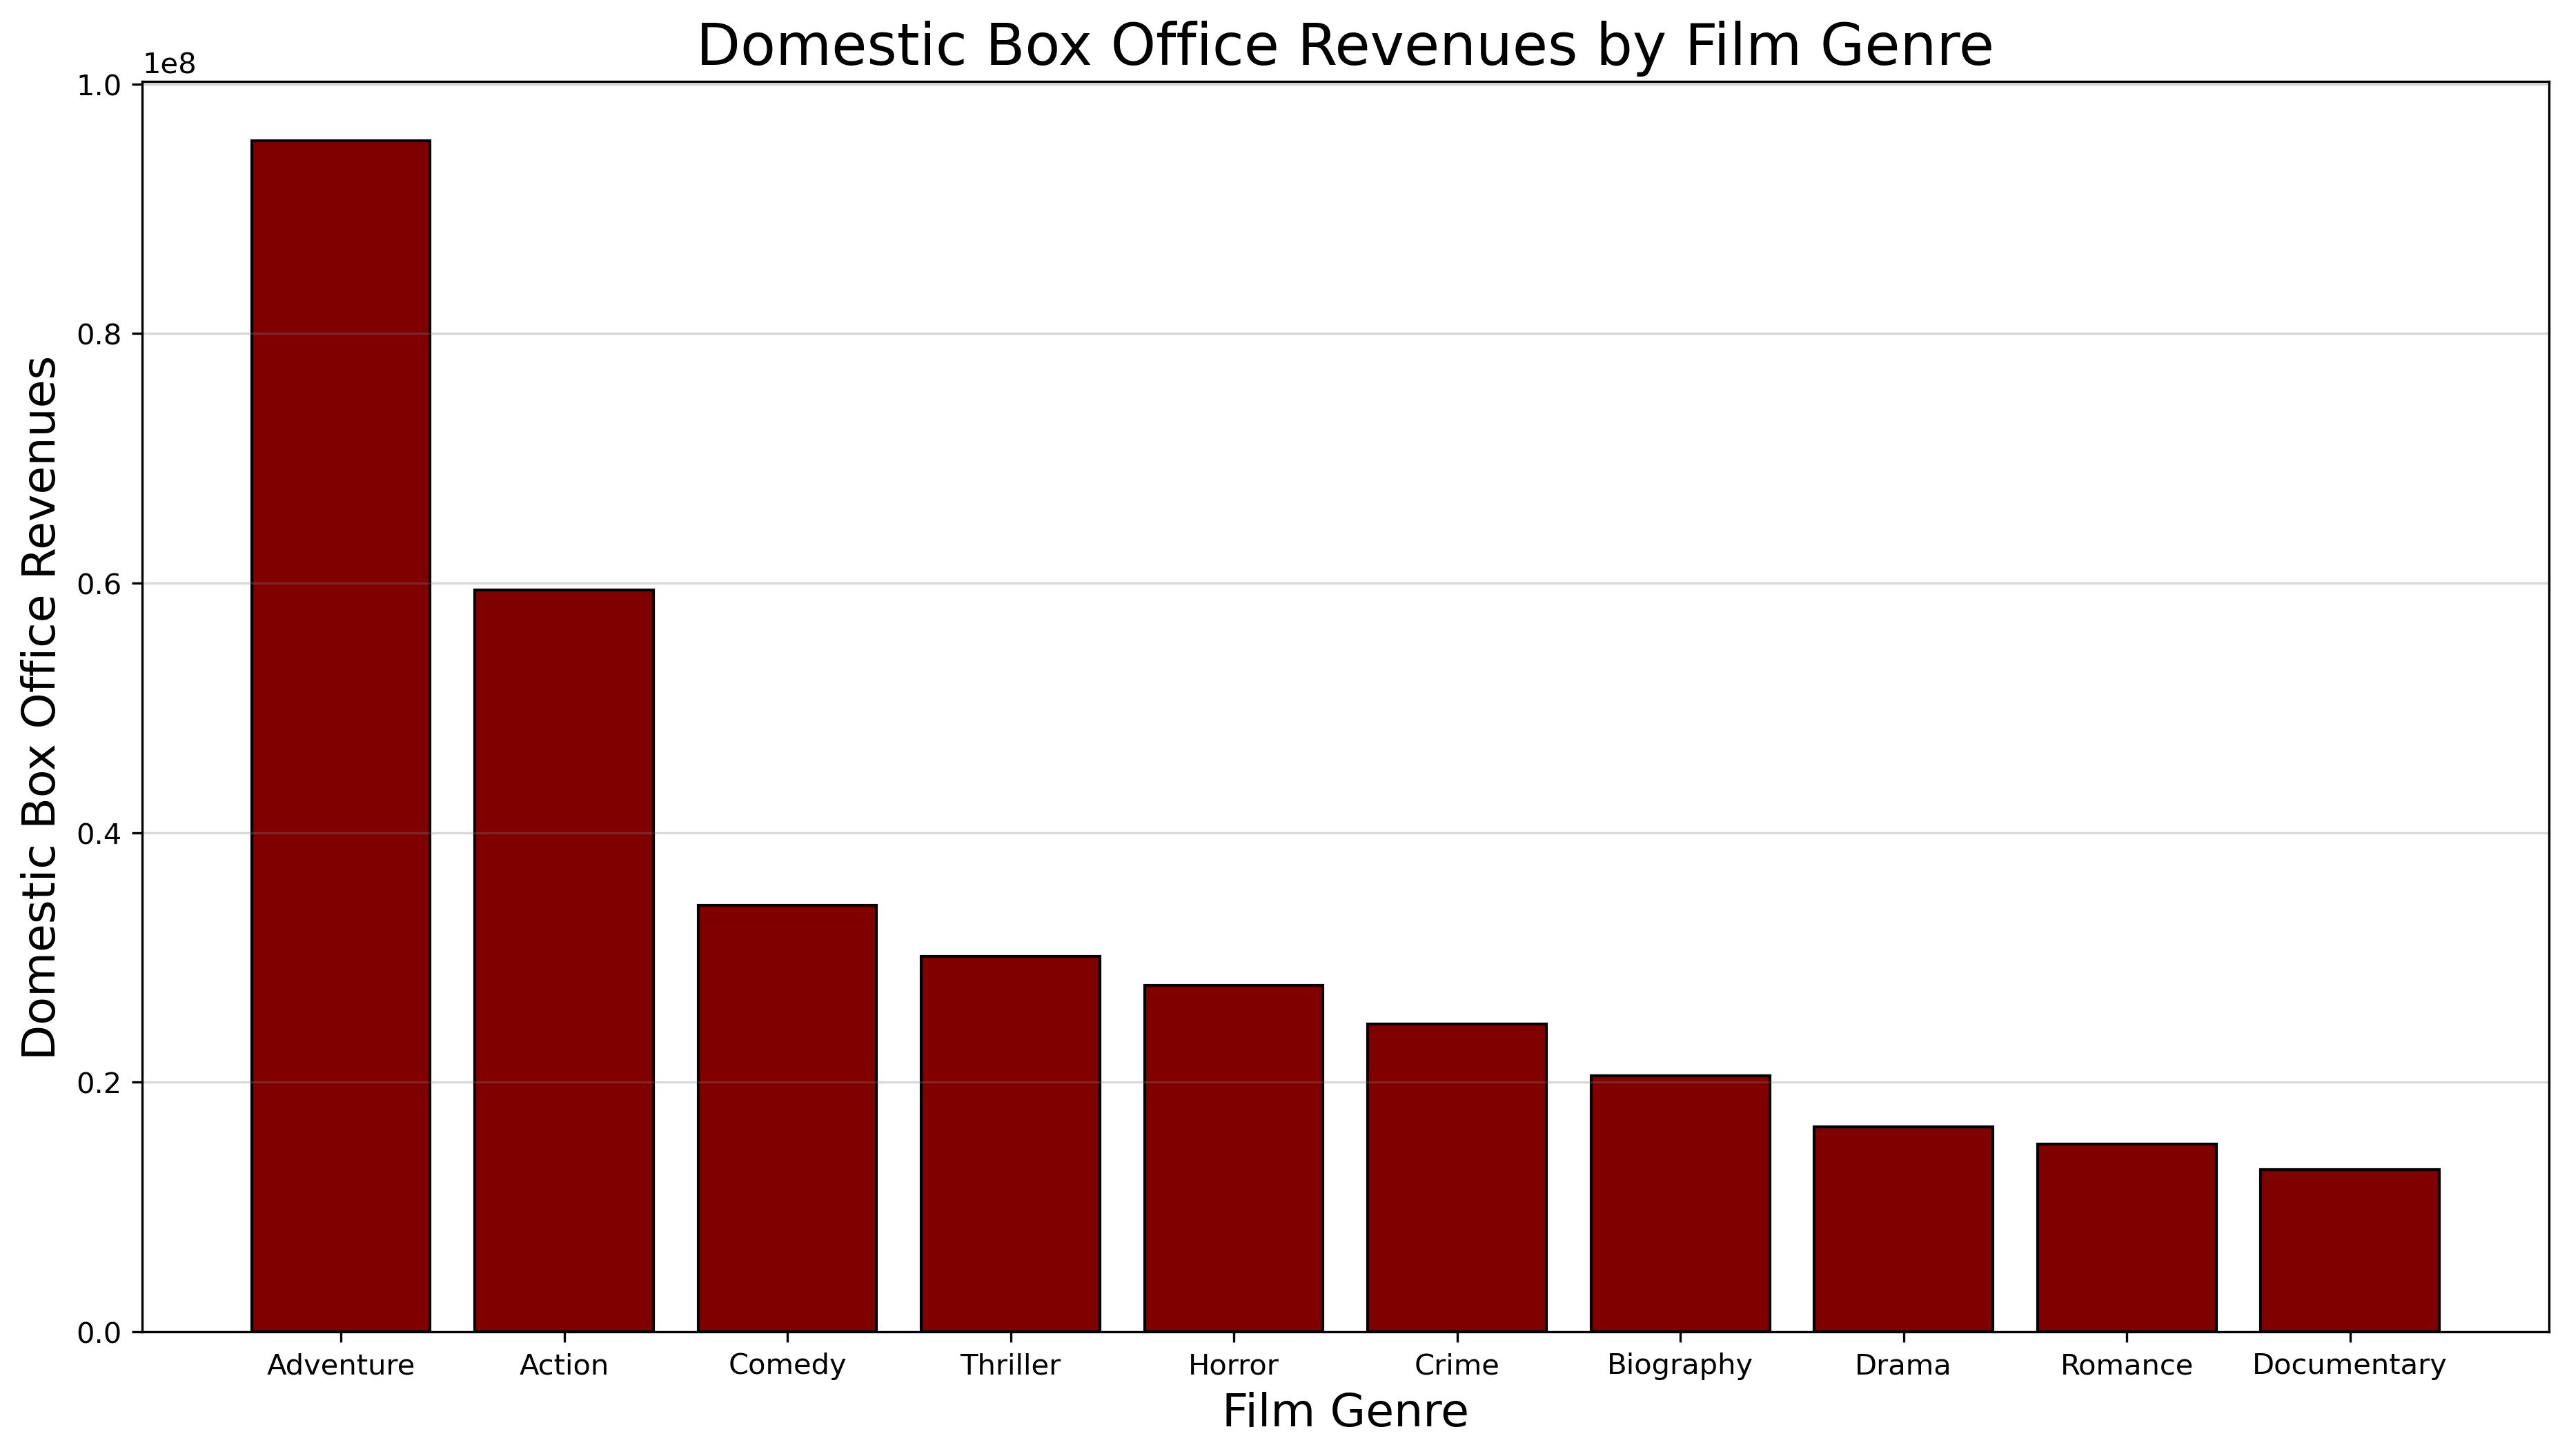

In [121]:
genre_gross_domestic = {}

drama_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Drama') == True]['domestic_gross'].mean()
action_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Action') == True]['domestic_gross'].mean()
comedy_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Comedy') == True]['domestic_gross'].mean()
romance_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Romance') == True]['domestic_gross'].mean()
documentary_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Documentary') == True]['domestic_gross'].mean()
adventure_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Adventure') == True]['domestic_gross'].mean()
crime_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Crime') == True]['domestic_gross'].mean()
thriller_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Thriller') == True]['domestic_gross'].mean()
horror_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Horror') == True]['domestic_gross'].mean()
biography_gross_avg = genre_success_domestic.loc[genre_success_domestic['genres'].str.contains('Biography') == True]['domestic_gross'].mean()

genre_gross_domestic['Drama'] = int(drama_gross_avg)
genre_gross_domestic['Action'] = int(action_gross_avg)
genre_gross_domestic['Comedy'] = int(comedy_gross_avg)
genre_gross_domestic['Romance'] = int(romance_gross_avg)
genre_gross_domestic['Documentary'] = int(documentary_gross_avg)
genre_gross_domestic['Adventure'] = int(adventure_gross_avg)
genre_gross_domestic['Crime'] = int(crime_gross_avg)
genre_gross_domestic['Thriller'] = int(thriller_gross_avg)
genre_gross_domestic['Horror'] = int(horror_gross_avg)
genre_gross_domestic['Biography'] = int(biography_gross_avg)

genre_gross_domestic_sorted = dict(sorted(genre_gross_domestic.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(genre_gross_domestic_sorted.keys(), genre_gross_domestic_sorted.values(), color='maroon', edgecolor='black')
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Domestic Box Office Revenues by Film Genre', fontsize=20)
ax.set_xlabel('Film Genre', fontsize=16)
ax.set_ylabel('Domestic Box Office Revenues', fontsize=16);

In [31]:
genre_success_foreign = imdb_df[['primary_title', 'genres']].merge\
                         (bom_df_total[['primary_title', 'foreign_gross']], on='primary_title', how='inner')

In [32]:
genre_success_foreign['primary_title'] = genre_success_foreign['primary_title'].drop_duplicates(keep=False)

In [33]:
genre_success_foreign

,primary_title,genres,foreign_gross
0,NaN,"Adventure,Drama,Romance",8000000.0
1,NaN,Drama,8000000.0
2,NaN,Drama,8000000.0
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",129900000.0
4,A Walk Among the Tombstones,"Action,Crime,Drama",26900000.0
...,...,...,...
1805,Detective Chinatown 2,"Action,Comedy,Mystery",542100000.0
1806,Hereditary,"Drama,Horror,Mystery",35300000.0
1807,Nobody's Fool,"Comedy,Drama,Romance",1800000.0
1808,How Long Will I Love U,Romance,82100000.0


In [34]:
imdb_df_runtime_cleaned = imdb_df.dropna(subset=['runtime_minutes', 'averagerating'])
imdb_df_runtime_cleaned

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136


In [35]:
_90to100_runtimes = imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(90, 100, 'left')]['runtime_minutes']
_90to100_ratings = imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(90, 100, 'left')]['averagerating']



In [70]:
runtimes_series = []
ratings_series = []

for runtime in list(range(80, 180, 10)):
    runtimes_series.append(imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(runtime, runtime+10, 'left')]['runtime_minutes'])

for runtime in list(range(80, 180, 10)):
    ratings_series.append(imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(runtime, runtime+10, 'left')]['averagerating'])

In [71]:
runtimes_list = []
ratings_list = []

for runtime in runtimes_series:
    runtimes_list.append(runtime.values)
    
for rating in ratings_series:
    ratings_list.append(rating.values)

In [76]:
ratings = []

for array in ratings_list:
    ratings.append(array.mean())

In [74]:
runtimes = []

for runtime in list(range(80, 180, 10)):
    runtimes.append((f"{runtime} to {runtime + 10}"))

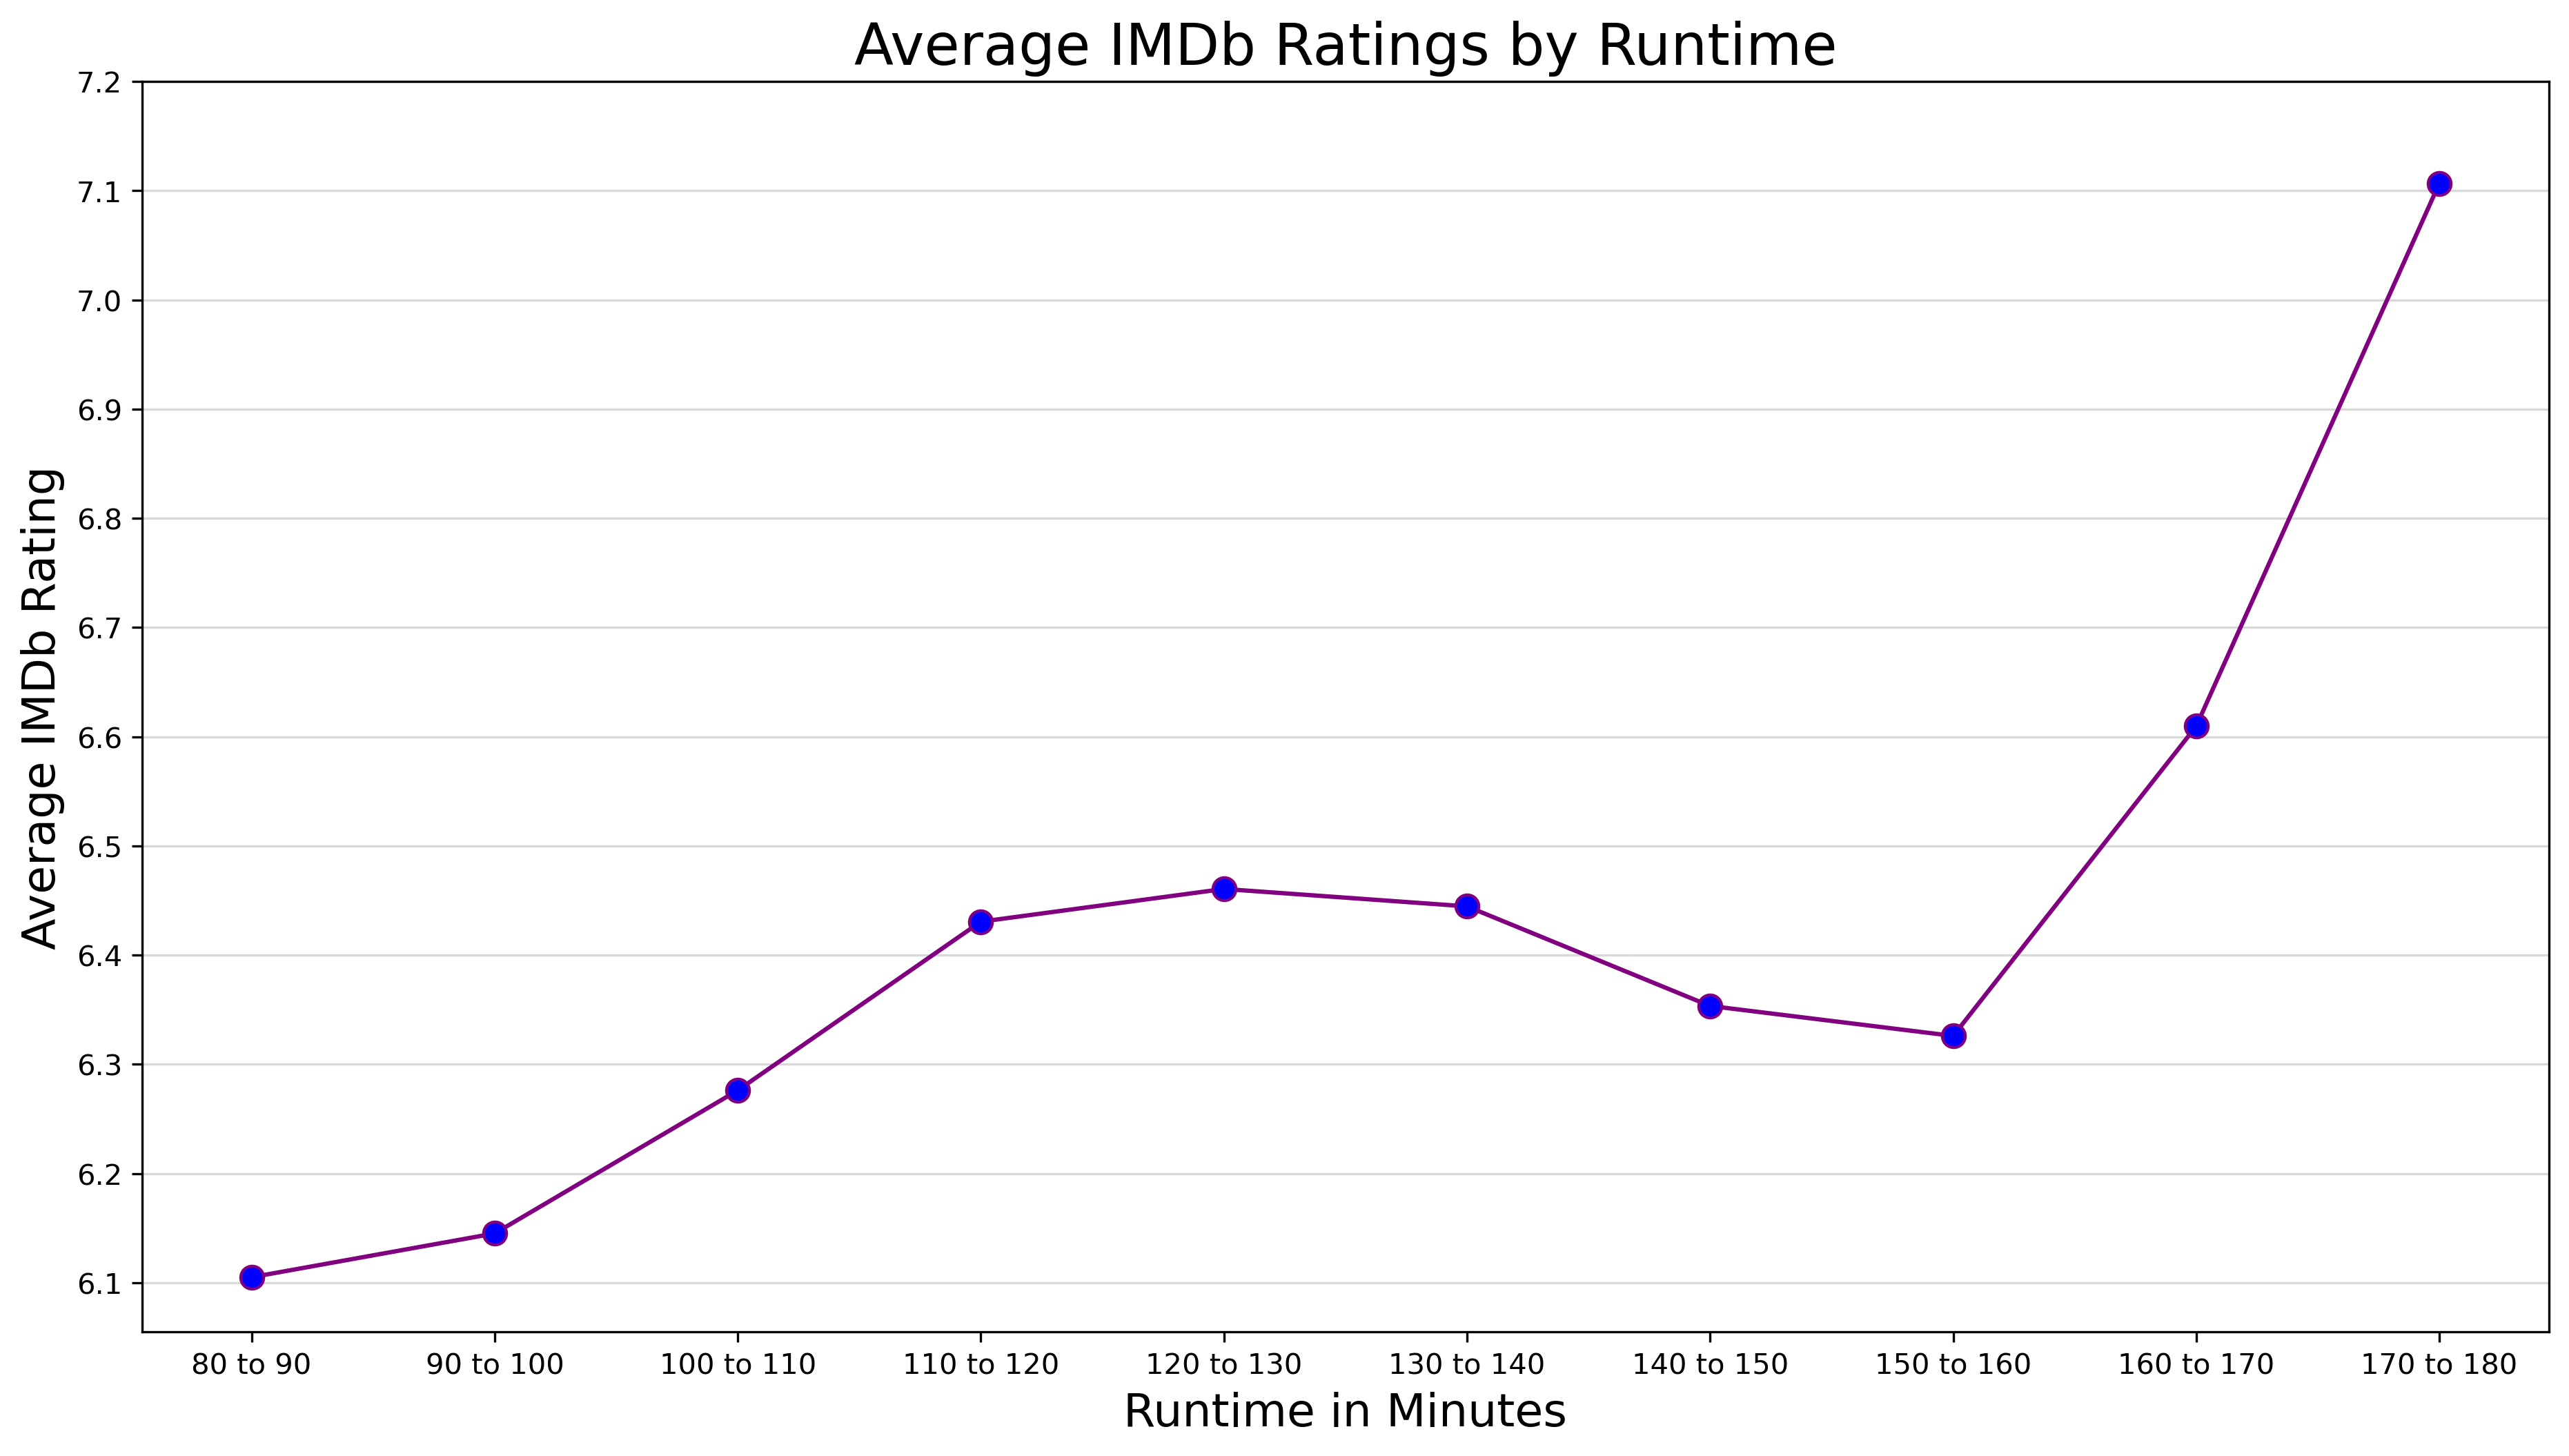

In [116]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(runtimes, ratings, marker='o', color='purple', markersize=8, markerfacecolor='blue')
ax.set_yticks(np.arange(6.1, 7.2, .1))
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Average IMDb Ratings by Runtime', fontsize=20)
ax.set_xlabel('Runtime in Minutes', fontsize=16)
ax.set_ylabel('Average IMDb Rating', fontsize=16);

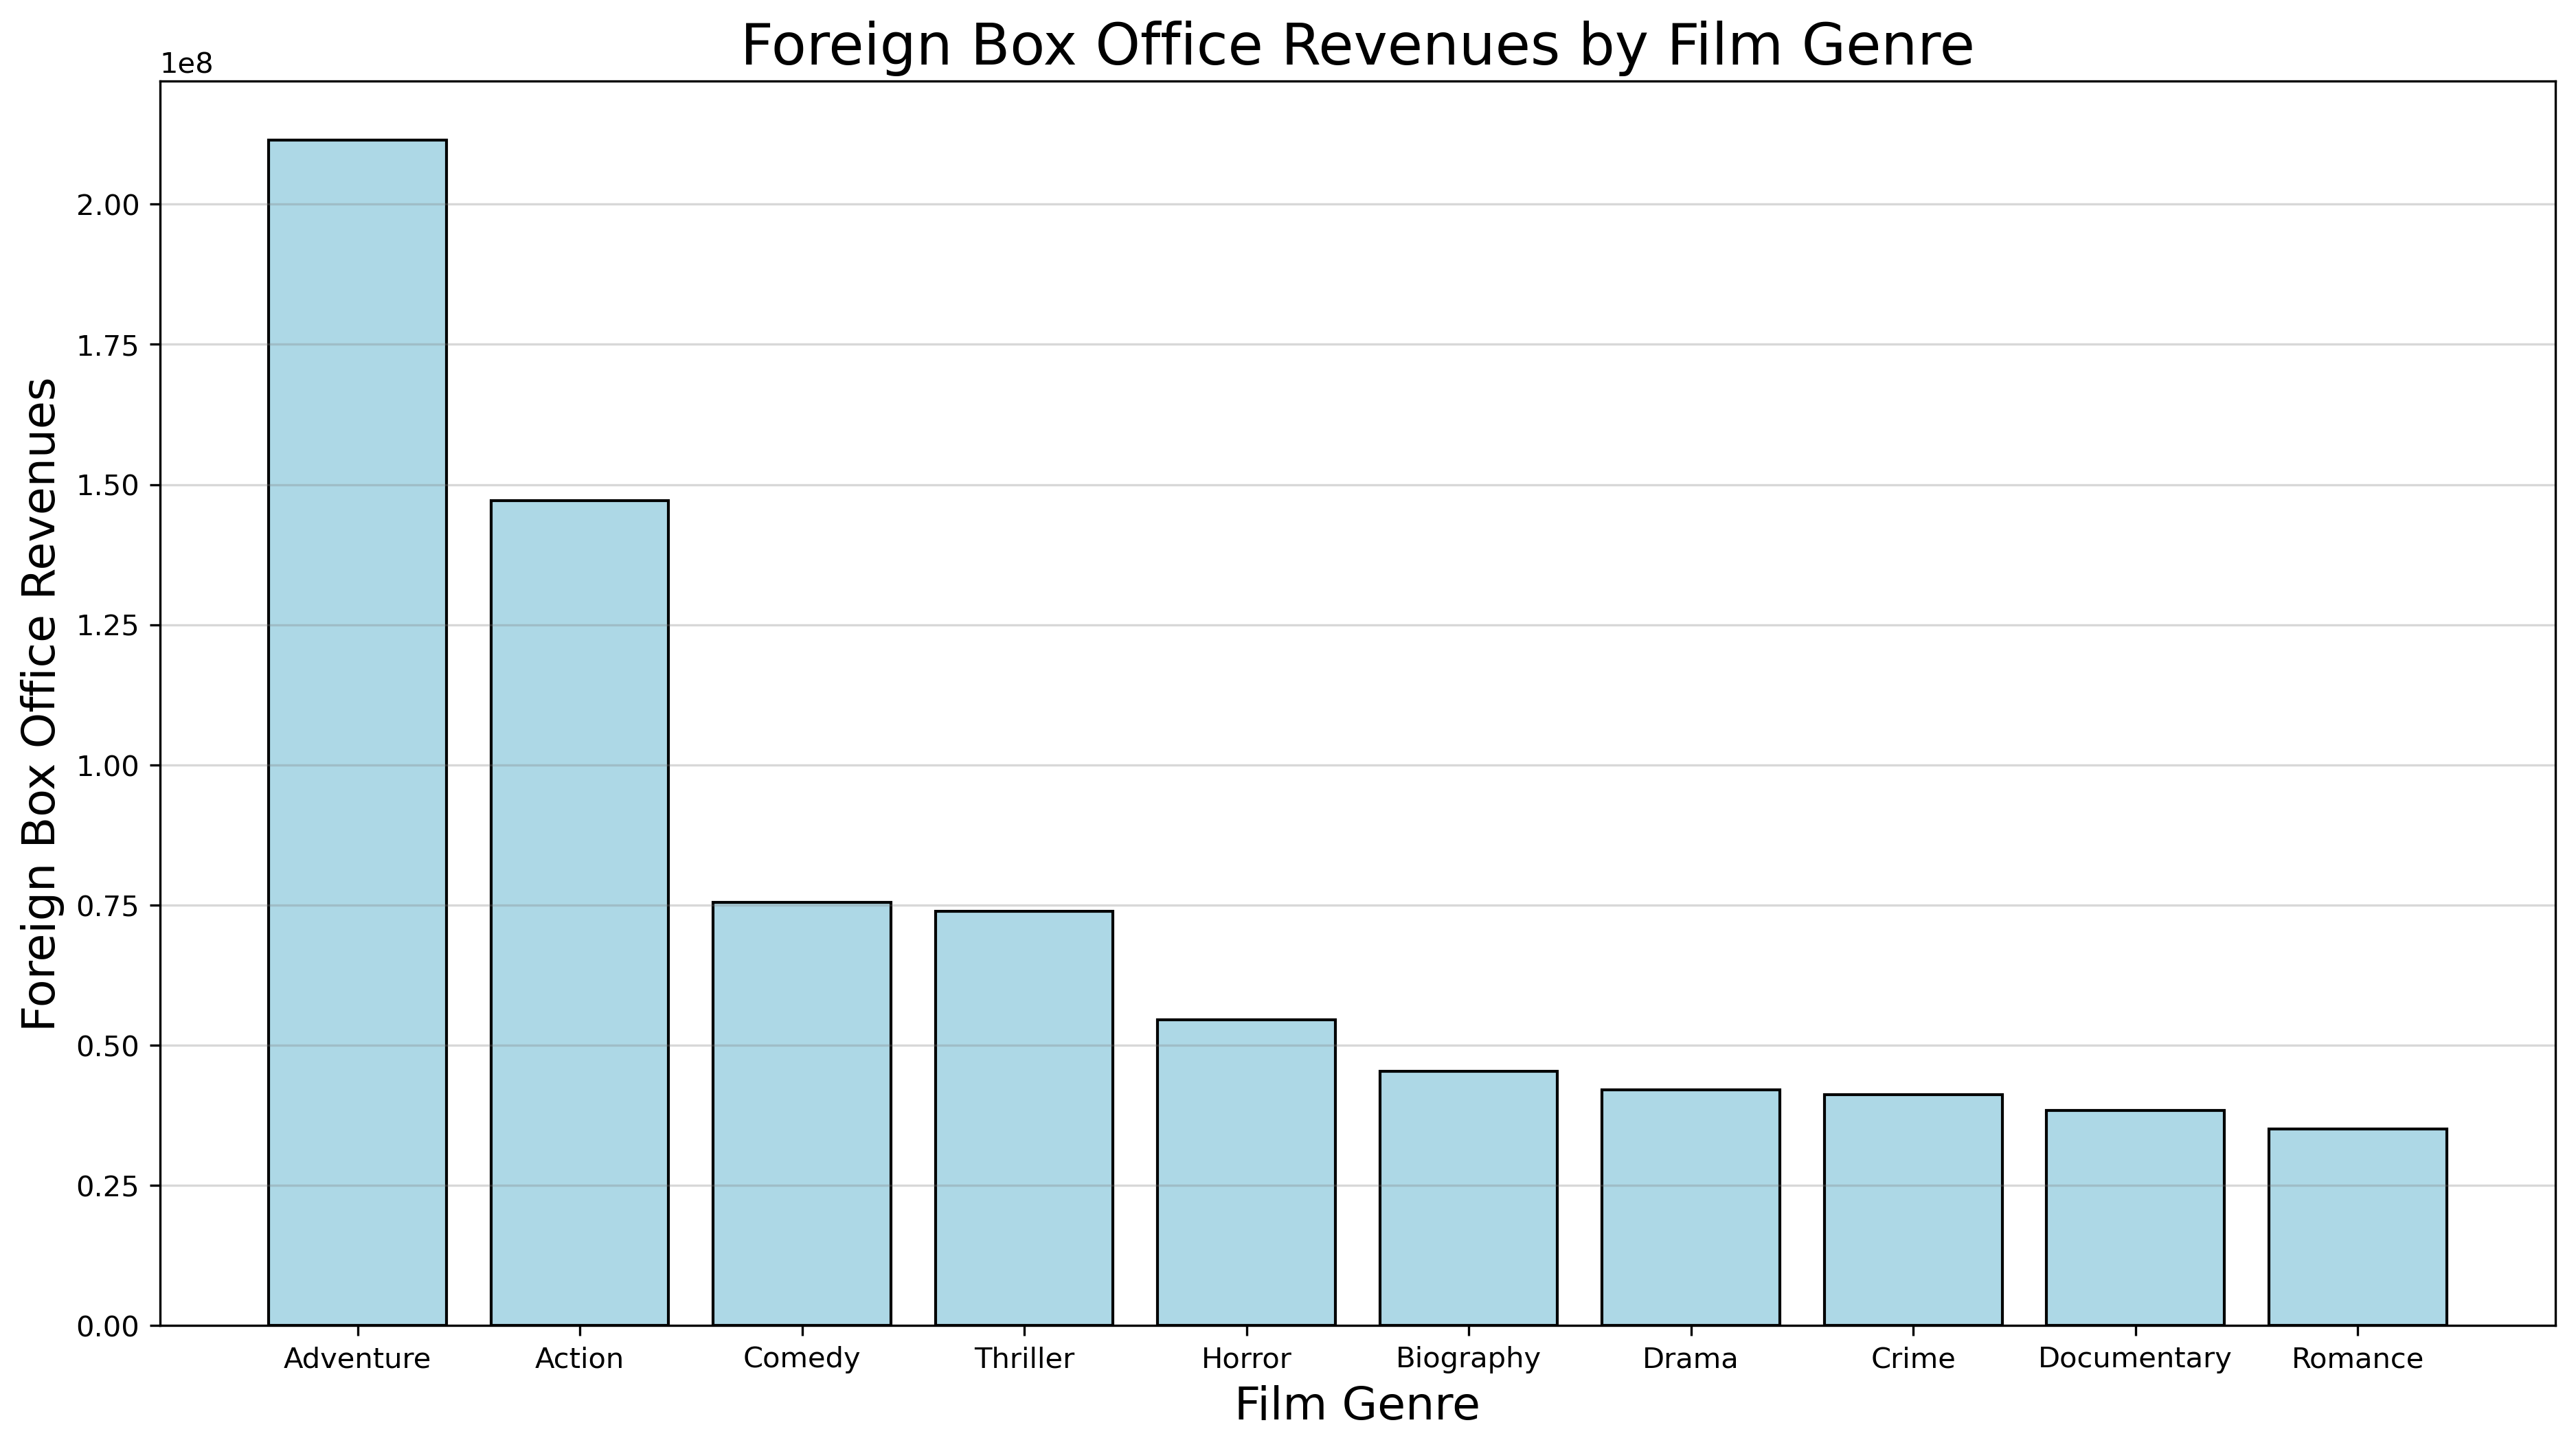

In [124]:
genre_gross_foreign = {}

drama_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Drama') == True]['foreign_gross'].mean()
action_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Action') == True]['foreign_gross'].mean()
comedy_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Comedy') == True]['foreign_gross'].mean()
romance_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Romance') == True]['foreign_gross'].mean()
documentary_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Documentary') == True]['foreign_gross'].mean()
adventure_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Adventure') == True]['foreign_gross'].mean()
crime_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Crime') == True]['foreign_gross'].mean()
thriller_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Thriller') == True]['foreign_gross'].mean()
horror_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Horror') == True]['foreign_gross'].mean()
biography_gross_avg = genre_success_foreign.loc[genre_success_foreign['genres'].str.contains('Biography') == True]['foreign_gross'].mean()

genre_gross_foreign['Drama'] = int(drama_gross_avg)
genre_gross_foreign['Action'] = int(action_gross_avg)
genre_gross_foreign['Comedy'] = int(comedy_gross_avg)
genre_gross_foreign['Romance'] = int(romance_gross_avg)
genre_gross_foreign['Documentary'] = int(documentary_gross_avg)
genre_gross_foreign['Adventure'] = int(adventure_gross_avg)
genre_gross_foreign['Crime'] = int(crime_gross_avg)
genre_gross_foreign['Thriller'] = int(thriller_gross_avg)
genre_gross_foreign['Horror'] = int(horror_gross_avg)
genre_gross_foreign['Biography'] = int(biography_gross_avg)

genre_gross_foreign_sorted = dict(sorted(genre_gross_foreign.items(), key=lambda item: item[1], reverse=True))


fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(genre_gross_foreign_sorted.keys(), genre_gross_foreign_sorted.values(), color='lightblue', edgecolor='black')
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Foreign Box Office Revenues by Film Genre', fontsize=20)
ax.set_xlabel('Film Genre', fontsize=16)
ax.set_ylabel('Foreign Box Office Revenues', fontsize=16);

# Data Analysis

### Analysis of average rating vs. gross revenues

We can see that there is a positive correlation between average IMDb rating and domestic box office revenues. There is an even stronger correlation between average IMDb rating and foreign box office revenues.

We would expect the average IMDb rating for a film to correlate with its box office revenues. But below we can see that average rating carries a stronger correlation with foreign box office revenues than with domestic box office revenues.

(Recommend campaigns to promote more reviews for films released in foreign markets?)

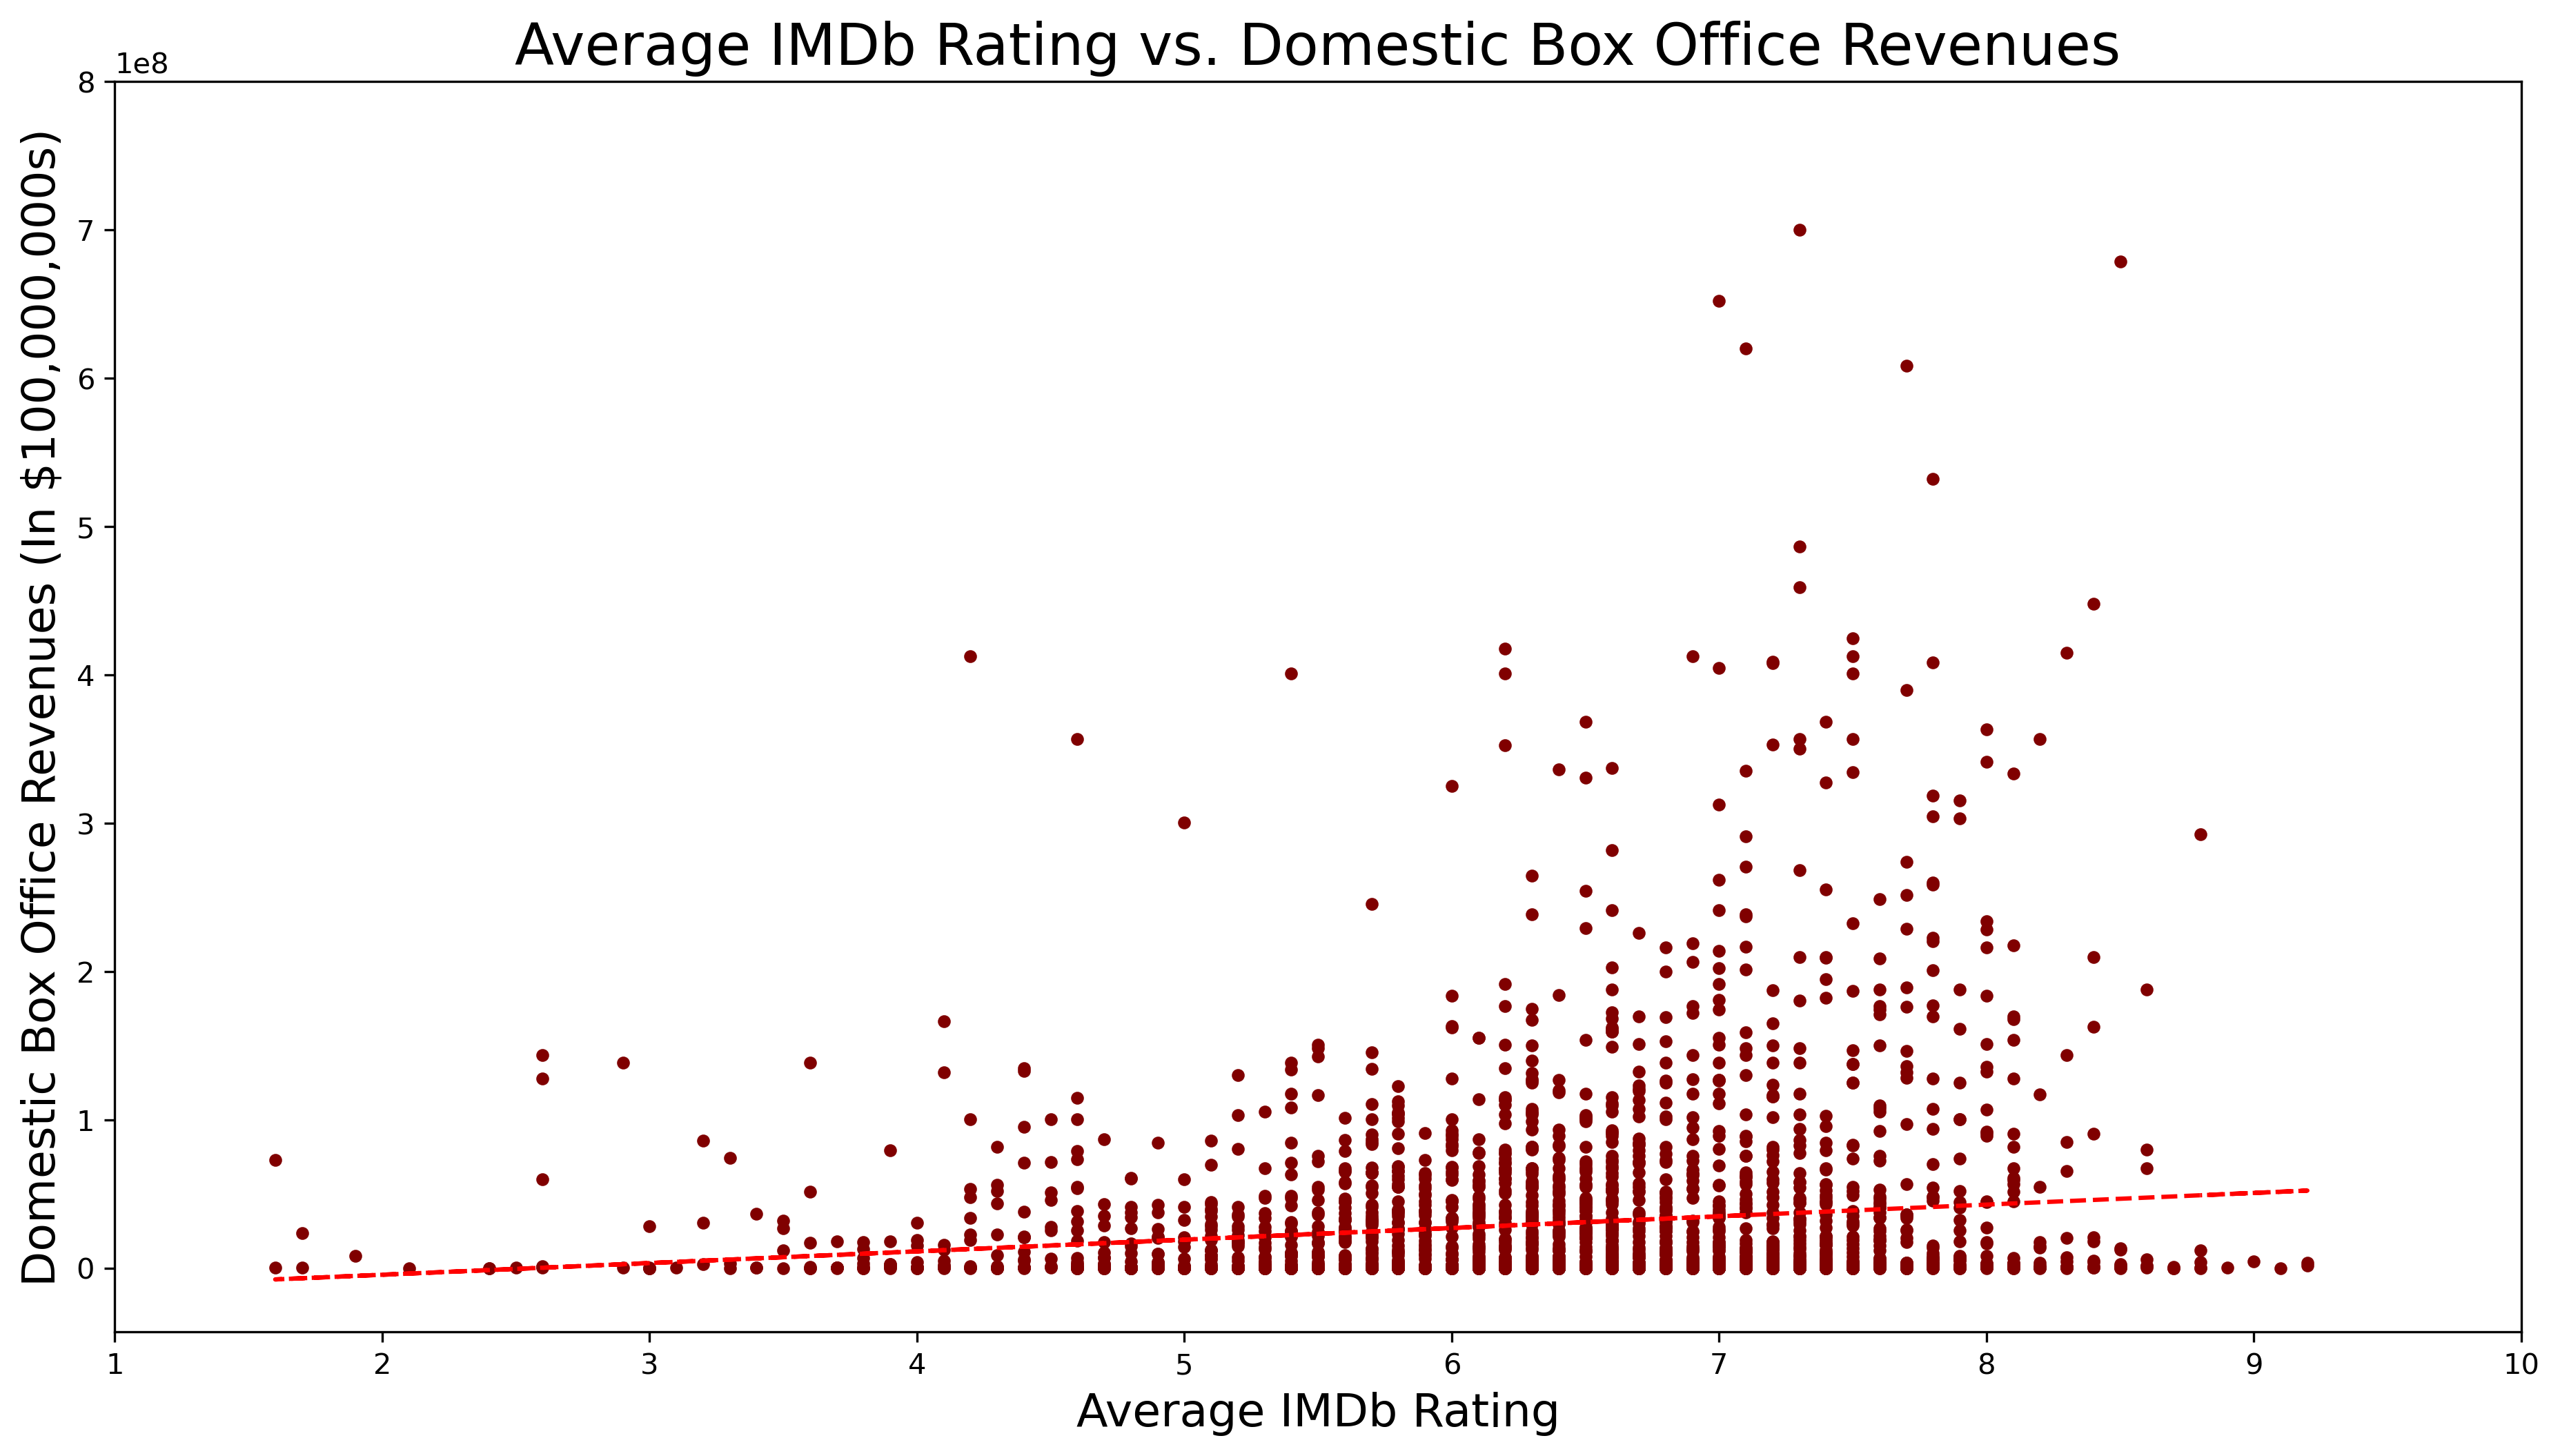

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

x = gross_vs_rating_domestic['averagerating']
y = gross_vs_rating_domestic['domestic_gross']

ax.scatter(x, y, s=12, color='maroon')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

ax.set_xticks(list(range(1, 11)))
ax.set_yticks(list(range(0, 900000000, 100000000)))

ax.set_title('Average IMDb Rating vs. Domestic Box Office Revenues', fontsize=20)
ax.set_xlabel('Average IMDb Rating', fontsize=16, color='black')
ax.set_ylabel('Domestic Box Office Revenues (In $100,000,000s)', fontsize=16, color='black');

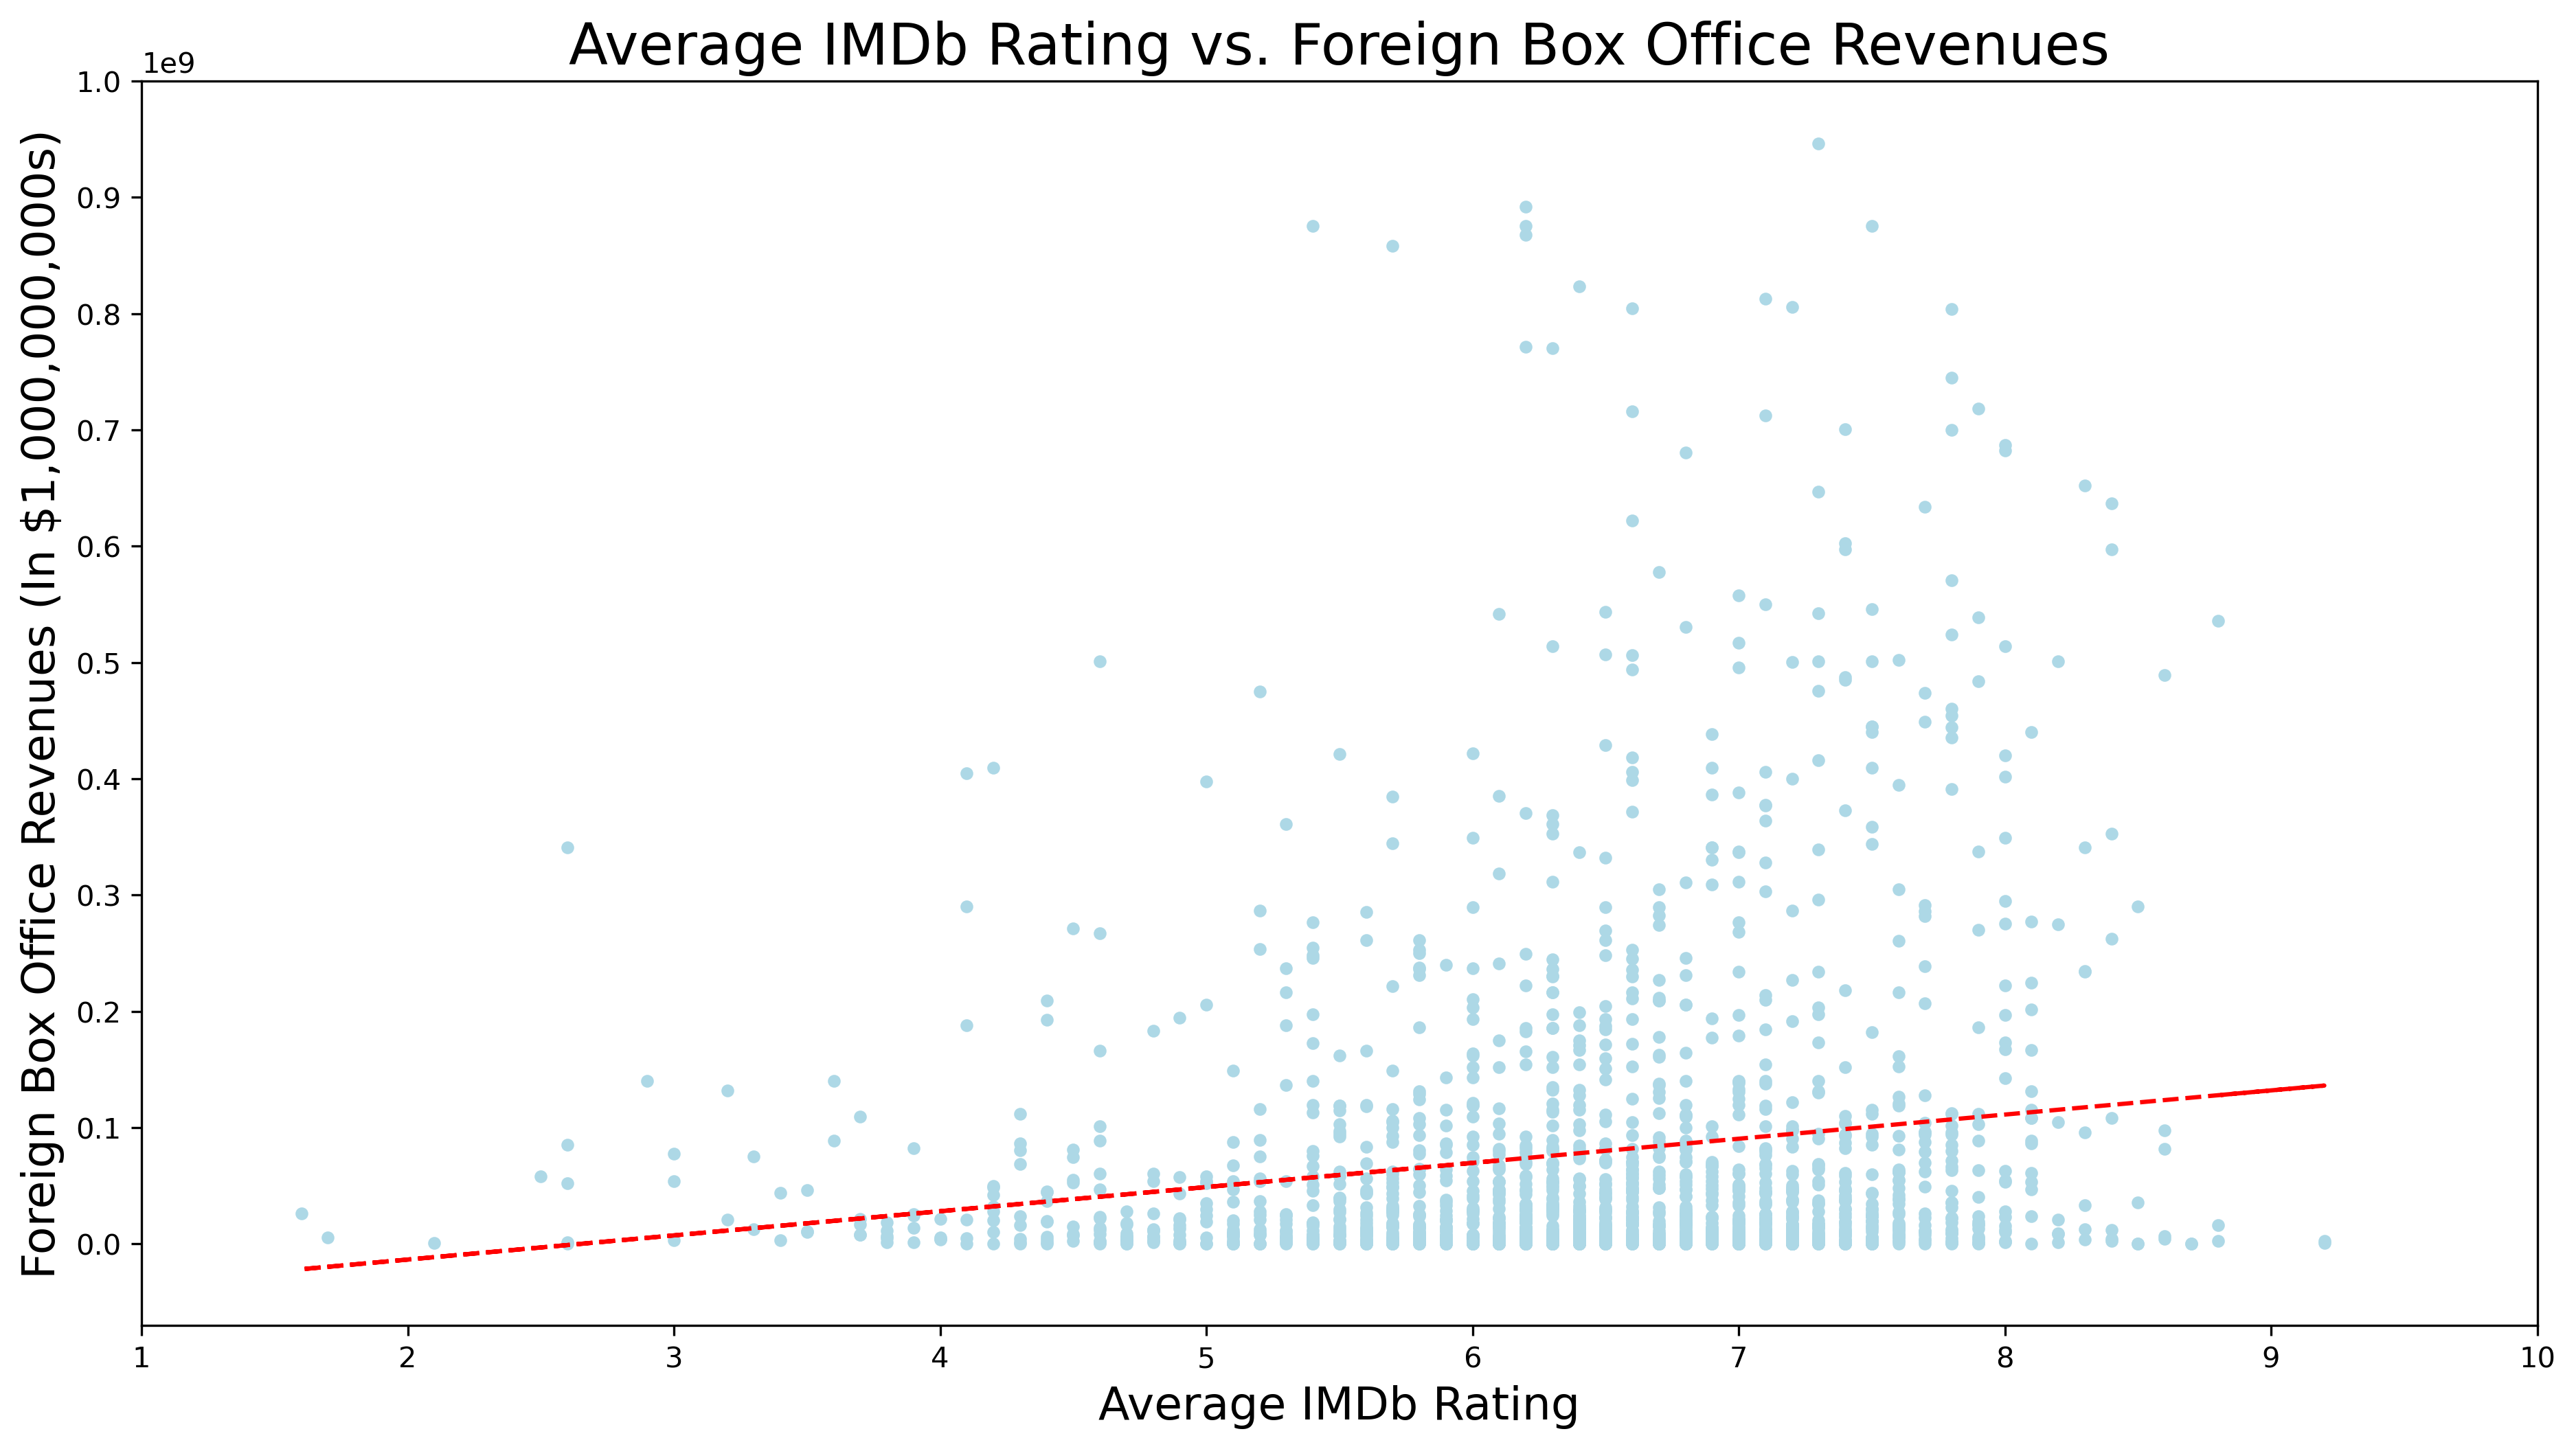

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))

x = gross_vs_rating_foreign['averagerating']
y = gross_vs_rating_foreign['foreign_gross']

ax.scatter(x, y, s=12, color='lightblue')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

ax.set_xticks(list(range(1, 11)))
ax.set_yticks(list(range(0, 1100000000, 100000000)))

ax.set_title('Average IMDb Rating vs. Foreign Box Office Revenues', fontsize=20)
ax.set_xlabel('Average IMDb Rating', fontsize=16, color='black')
ax.set_ylabel('Foreign Box Office Revenues (In $1,000,000,000s)', fontsize=16, color='black');

## Analysis of most successful movie genres